<ipython-input-1-c6a070924dda>:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read(filename)


Sample Rate: 44100
Speech Signal Shape: (262094,)
Impulse Response Shape: (100,)
Convolution Result Shape: (262193,)


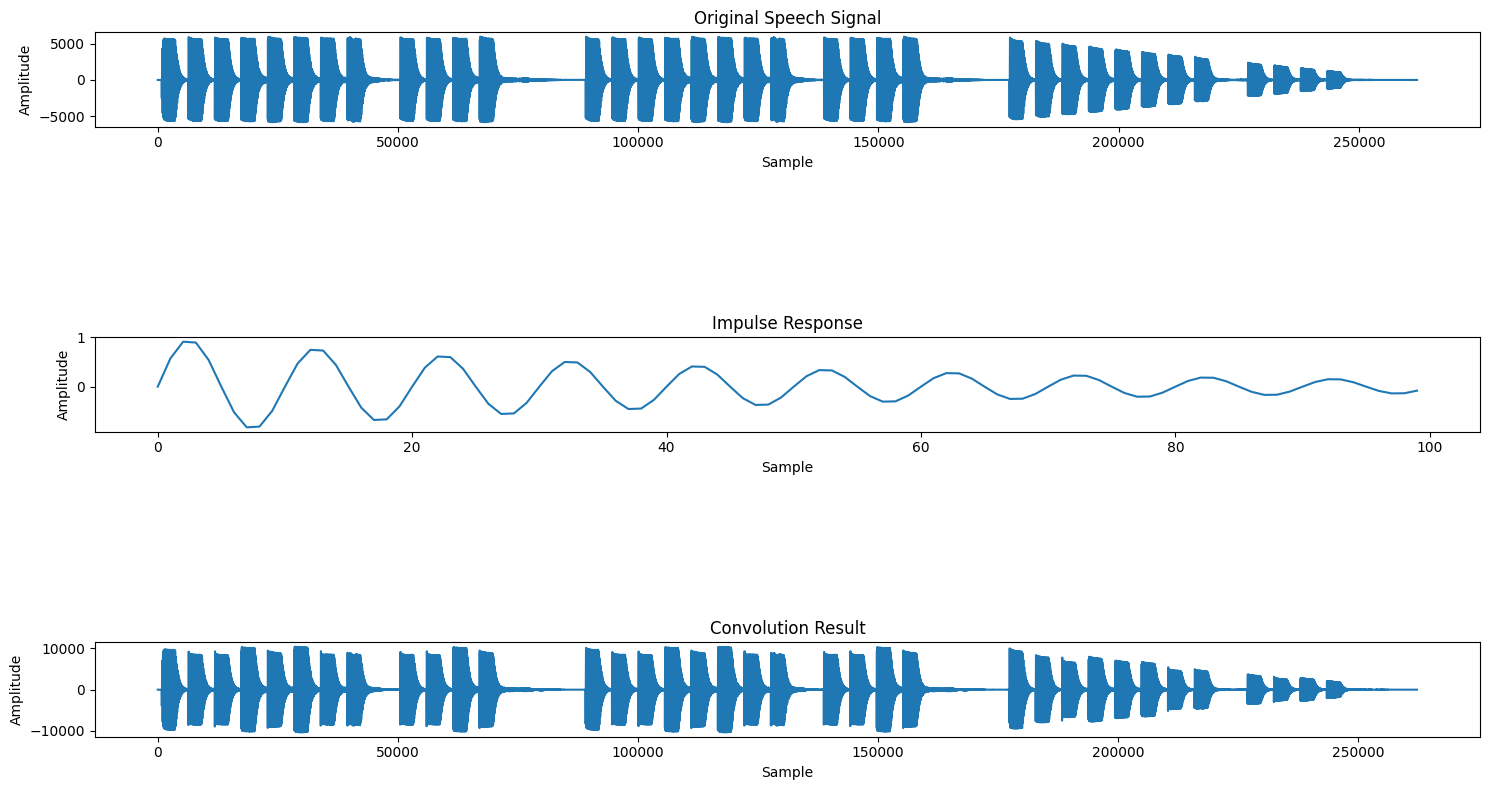

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def load_audio(filename):
    """Load an audio file."""
    sample_rate, data = wavfile.read(filename)
    if data.ndim > 1:
        # If stereo, convert to mono by averaging the channels
        data = np.mean(data, axis=1)
    return sample_rate, data

def generate_impulse_response(length=100):
    """Generate a synthetic impulse response for demonstration."""
    t = np.linspace(0, 1, length, endpoint=False)
    impulse_response = np.sin(2 * np.pi * 10 * t) * np.exp(-2 * t)
    return impulse_response

def perform_convolution(signal, impulse_response):
    """Perform convolution of the signal with the impulse response."""
    return np.convolve(signal, impulse_response, mode='full')

def plot_signals(original_signal, impulse_response, conv_result):
    """Plot the original signal, impulse response, and convolution result."""
    plt.figure(figsize=(15, 8))

    plt.subplot(5, 1, 1)
    plt.plot(original_signal)
    plt.title('Original Speech Signal')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    plt.subplot(5, 1, 3)
    plt.plot(impulse_response)
    plt.title('Impulse Response')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    plt.subplot(5, 1, 5)
    plt.plot(conv_result)
    plt.title('Convolution Result')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

def main():
    # Load the speech signal
    sample_rate, speech_signal = load_audio('/content/example_WAV.wav')

    # Debugging output
    print(f"Sample Rate: {sample_rate}")
    print(f"Speech Signal Shape: {speech_signal.shape}")

    # Generate an impulse response (for demonstration purposes)
    impulse_response = generate_impulse_response()

    # Debugging output
    print(f"Impulse Response Shape: {impulse_response.shape}")

    # Perform convolution
    conv_result = perform_convolution(speech_signal, impulse_response)

    # Debugging output
    print(f"Convolution Result Shape: {conv_result.shape}")

    # Plot the results
    plot_signals(speech_signal, impulse_response, conv_result)

if __name__ == "__main__":
    main()
